# Games analysis
# Project Description
It is necessary to analyze the data belonging to the online game store "Streamchick". In particular, to determine what patterns affect the success of games, as well as to predict sales for the next calendar year (2017).
To do this, the project work will consist of several phases: data pre-processing, exploratory data analysis, in particular user insights, and hypothesis testing.  
**Purpose of the work**: To analyze the popularity of games in relation to the available parameters as well as users' preferences.  
**Objectives of the work**:  
Carry out data pre-processing;
Analyze the distribution and popularity of games and platforms;
Create a user profile;
Test hypotheses;
Draw conclusions.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

<h1>Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Games-analysis" data-toc-modified-id="Games-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Games analysis</a></span></li><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Project Description</a></span><ul class="toc-item"><li><span><a href="#Information-about-dataset" data-toc-modified-id="Information-about-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Information about dataset</a></span></li></ul></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Technical-cleaning" data-toc-modified-id="Technical-cleaning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Technical cleaning</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Gaining-additional-data" data-toc-modified-id="Gaining-additional-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gaining additional data</a></span></li><li><span><a href="#Conclusions-on-data-pre-processing" data-toc-modified-id="Conclusions-on-data-pre-processing-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Conclusions on data pre-processing</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Game-releases-by-year" data-toc-modified-id="Game-releases-by-year-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Game releases by year</a></span></li><li><span><a href="#Platform-Sales" data-toc-modified-id="Platform-Sales-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Platform Sales</a></span></li><li><span><a href="#Which-platforms-are-leading-in-sales,-growing-or-falling?" data-toc-modified-id="Which-platforms-are-leading-in-sales,-growing-or-falling?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Which platforms are leading in sales, growing or falling?</a></span></li><li><span><a href="#A-box-and-whisker-chart-of-global-game-sales-by-platform." data-toc-modified-id="A-box-and-whisker-chart-of-global-game-sales-by-platform.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>A box-and-whisker chart of global game sales by platform.</a></span></li><li><span><a href="#Let's-take-a-look-at-the-impact-of-critic-and-user-reviews-on-sales-for-PS4-and-XOne,-the-most-popular-consoles." data-toc-modified-id="Let's-take-a-look-at-the-impact-of-critic-and-user-reviews-on-sales-for-PS4-and-XOne,-the-most-popular-consoles.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Let's take a look at the impact of critic and user reviews on sales for PS4 and XOne, the most popular consoles.</a></span></li><li><span><a href="#Correlation-of-conclusions-with-general-indicators-for-all-platforms." data-toc-modified-id="Correlation-of-conclusions-with-general-indicators-for-all-platforms.-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Correlation of conclusions with general indicators for all platforms.</a></span></li><li><span><a href="#General-distribution-of-games-by-genre." data-toc-modified-id="General-distribution-of-games-by-genre.-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>General distribution of games by genre.</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#A-portrait-of-users-in-each-region" data-toc-modified-id="A-portrait-of-users-in-each-region-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>A portrait of users in each region</a></span><ul class="toc-item"><li><span><a href="#Most-popular-platforms-(top-5)" data-toc-modified-id="Most-popular-platforms-(top-5)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Most popular platforms (top 5)</a></span></li><li><span><a href="#Most-popular-genres-(top-5)" data-toc-modified-id="Most-popular-genres-(top-5)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Most popular genres (top 5)</a></span></li><li><span><a href="#Impact-of-ESRB-rating-on-regional-sales" data-toc-modified-id="Impact-of-ESRB-rating-on-regional-sales-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Impact of ESRB rating on regional sales</a></span></li><li><span><a href="#Additional-Analysis" data-toc-modified-id="Additional-Analysis-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Additional Analysis</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hypothesis testing</a></span><ul class="toc-item"><li><span><a href="#Average-user-ratings-of-Xbox-One-and-PC-platforms-are-the-same" data-toc-modified-id="Average-user-ratings-of-Xbox-One-and-PC-platforms-are-the-same-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Average user ratings of Xbox One and PC platforms are the same</a></span></li><li><span><a href="#Average-user-ratings-of-Action-and-Sports-genres-are-different." data-toc-modified-id="Average-user-ratings-of-Action-and-Sports-genres-are-different.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Average user ratings of Action and Sports genres are different.</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#General-conclusions" data-toc-modified-id="General-conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>General conclusions</a></span></li></ul></div>

## Information about dataset

In [2]:
# Online and offline work
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('C:/Users/Ivan/datasetsYP/games.csv')

# Information about dataset
df.info()
display(df.head(10))
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Data from the service consist of:    
•	Name — name of game  
•	Platform — platform  
•	Year_of_Release — year of release  
•	Genre — game genre  
•	NA_sales — sales in North America (million copies)  
•	EU_sales — sales in Europe (million copies)  
•	JP_sales — sales in Japan (million copies)  
•	Other_sales — sales in the rest of the world (million copies)  
•	Critic_Score — critic score (from 0 to 100, higher - better)  
•	User_Score — gamers score (from 0 to 10, higher - better)  
•	Rating — rating ESRB (Entertainment Software Rating Board). Is rating based on violence, sex, etc., determining the possible minimun age of users.

# Data cleaning
## Technical cleaning
It is important to bring data to a suitable format - change data types, check for duplicates, etc.

All the column names are in lower register, let's check: Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


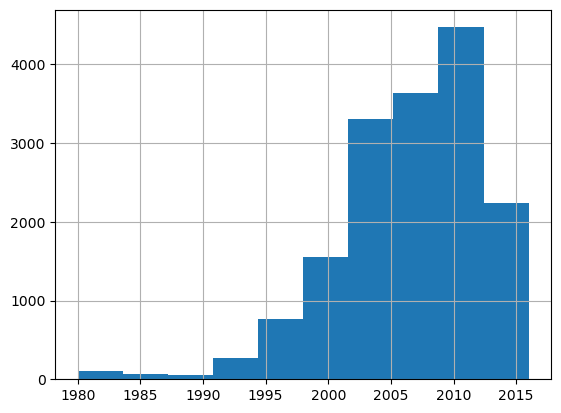

In [3]:
# Brin columns names to lower сфыу
df.columns = df.columns.str.lower()
print("All the column names are in lower register, let's check:", df.columns)

# Changing data types - years of release should be int, beforhead we should get rid of NaN values
# Checking distribution
df['year_of_release'].hist()
# As there are not many of them and distribution by year is not simple - it is easier to drop missing values

df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int)


In [4]:
# Checking for duplicates
print('Number of full duplicates:', df.duplicated().sum())

# Checking for duplicates with the same name, platform, and year of release
# This would indicate real dulicates which for some reason have different states (sales, scores)
print('Duplicates with the same name, platform, and year of release')
display(df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)])

# Duplicates with the same name and year of release
# This would be not duplicates - games often have several platforms that they have been released on
print('Duplicates with same name and year of release')
display(df[df[['name', 'year_of_release']].duplicated(keep=False)])

# Droping duplicates with the same name, platform and year
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])        
display(df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)].shape)

Number of full duplicates: 0
Duplicates with the same name, platform, and year of release


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Duplicates with same name and year of release


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


(0, 11)

Column names were brought to lower case.
Data type of year column was changed from float to int.
User score has object type, this problem will be addressed later.
There are no full duplicates, however 2 duplicates had same name, palatform and year of release - they were removed.

## Missing values


In [5]:
# Number of NaN by column
print('Number of NaN by column')
display(df.isna().sum())

# Rate of NaN values to all values by column
print('Rate of NaN values to all values by column')
pd.DataFrame(round(df.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

Number of NaN by column


name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score         6606
rating             6677
dtype: int64

Rate of NaN values to all values by column


,0
critic_score,51.500000
rating,40.600000
user_score,40.200000
name,0.000000
genre,0.000000
platform,0.000000
year_of_release,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


Missing values were found in the following columns: **title** (one gaps) - it is not important, one can fill in an empty line.
There are also one gap in the **genre** column, since there are only one of them, and we need the genre in the subsequent analysis, this values can be deleted (which is also the missing one title).  
The skips in **year of release** were deleted because there are few of them and the distribution does not allow to fill them with the median value.  
The omissions in **rating, critic rating and user rating** represent a very large percentage of the total data, on the order of 40-50%. This indicates a serious problem in data collection, or errors in the initial processing of the data. Filling such a large number of values with the median can lead to serious distortions in the statistics. At this stage, we will leave these gaps unfilled and return to them at the stage of exploratory data analysis.

In [6]:
df['name'] = df['name'].fillna('')
df = df.dropna(subset=['genre'])

df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Note the abbreviation 'tbd' in the column with user ratings.  
Apparently, this value corresponds to the abbreviation for "to be determined", probably, the data got lost in the process or was not yet collected. At present, we cannot fill them in any way other than NaN so that the column can be translated into a numeric format for later work. However, in order not to lose information about this indicator, we will start a mask with information whether 'tbd' was in the column or not.


In [7]:
df['user_score_is_tbd'] = df['user_score'].str.contains('tbd', na=False)
df.loc[df['user_score'].str.contains('tbd', na=False)] = np.nan
df['user_score'] = df['user_score'].astype(float)

## Gaining additional data
Calculation of total sales.

In [8]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.info())
display(df.head(15))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               14067 non-null  object 
 1   platform           14067 non-null  object 
 2   year_of_release    14067 non-null  float64
 3   genre              14067 non-null  object 
 4   na_sales           14067 non-null  float64
 5   eu_sales           14067 non-null  float64
 6   jp_sales           14067 non-null  float64
 7   other_sales        14067 non-null  float64
 8   critic_score       6926 non-null   float64
 9   user_score         7462 non-null   float64
 10  rating             7441 non-null   object 
 11  user_score_is_tbd  14067 non-null  object 
 12  total_sales        14067 non-null  float64
dtypes: float64(8), object(5)
memory usage: 1.8+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_is_tbd,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,False,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,False,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,False,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,False,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,False,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,False,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,False,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,False,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,False,28.31


Let's analyze the quantitative data that we do not fill in at the moment (critic_score, user_score).
Both distributions have the form of a lognormal distribution with no outliers.
Interestingly, critics clearly gravitate towards 0 and 5 in their scores, while users have a much more uniform distribution.
Let's also analyze the categorical variable that we do not fill in (rating).
Almost all sales fall into 4 ratings: E, M, T, E10+.

Critic scores


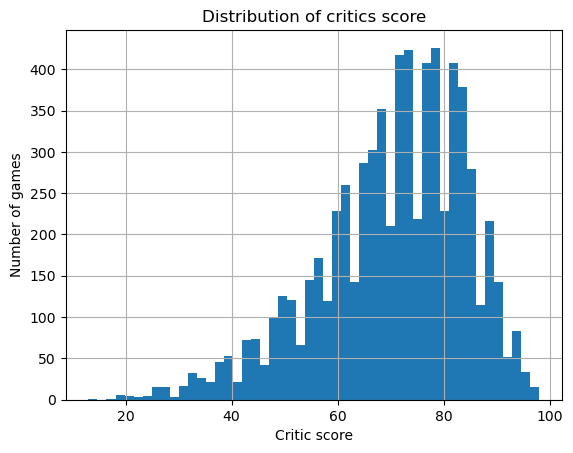

count    6926.000000
mean       70.246896
std        13.868812
min        13.000000
25%        62.000000
50%        72.000000
75%        80.000000
max        98.000000
Name: critic_score, dtype: float64


Users score


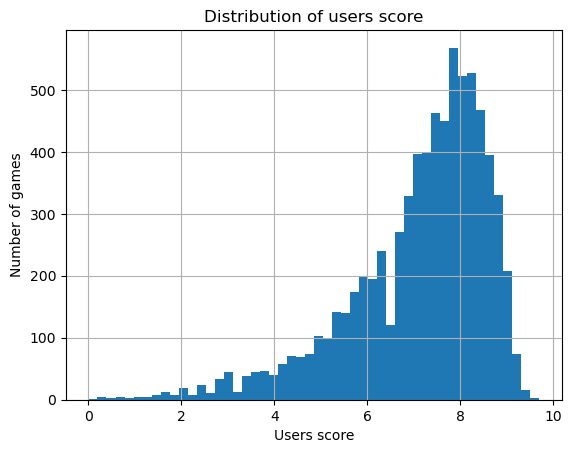

count    7462.000000
mean        7.126548
std         1.499429
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


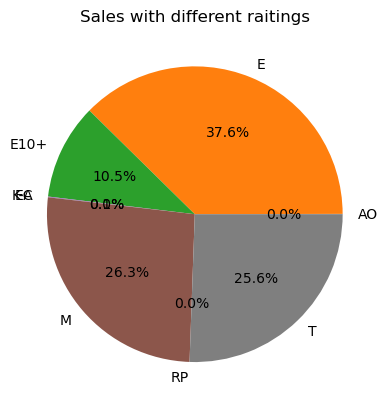

In [9]:
print('Critic scores')
df['critic_score'].hist(bins = 50)
plt.title(label='Distribution of critics score', loc='center')
plt.xlabel("Critic score")
plt.ylabel("Number of games")
plt.show()
display(df['critic_score'].describe())

print('\nUsers score')
df['user_score'].hist(bins = 50)
plt.title(label='Distribution of users score', loc='center')
plt.xlabel("Users score")
plt.ylabel("Number of games")
plt.show()
display(df['user_score'].describe())

print(df['rating'].unique())
fig, ax = plt.subplots()
ax.pie(df.groupby(['rating']).total_sales.sum(),
       labels=df.groupby(['rating']).total_sales.sum().index, autopct='%1.1f%%')
plt.title(label='Sales with different raitings', loc='center')
plt.show()

## Conclusions on data pre-processing

Work has been done on the data for ease of subsequent analysis, in particular:  
Column names were brought to lower case  
The data types for year of release and user rating were changed to int and float, respectively.  
Skips in columns name, genre, year_of_release were processed  
Removed 'tbd' values from the user_score column  
Calculated total sales  
  
However, the gaps in user_score, critic_score, rating columns were not filled due to a very large number of missing values, these columns will be investigated in detail in the next part.  
  
In general, the dataset is ready to work.

# Exploratory data analysis
## Game releases by year
The graph below shows the number of games released in each year of the measurements.  
The number of games released before 1995 is very small compared to the total number of games, also a noticeable growth starts after 2000, so we can take games released from 2000 to 2015 as the study interval. In 2016, there is a serious surge, it is not clear what it is caused by, perhaps by the actions of the company. However, it is better not to take this data for analysis.

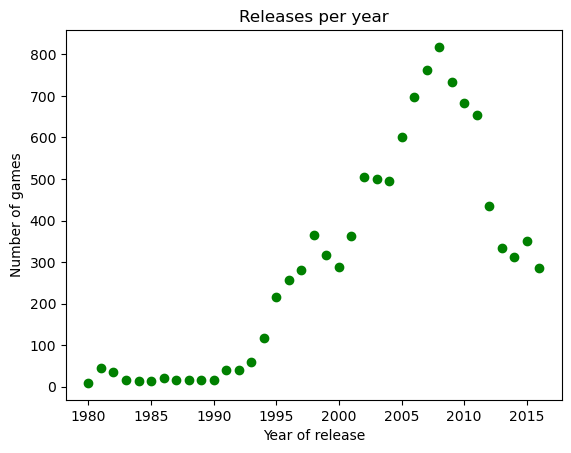

count    14067.000000
mean      2006.323026
std          6.174141
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2011.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [10]:
plt.plot(df.groupby(['year_of_release'])['name'].nunique().index,
             df.groupby(['year_of_release'])['name'].nunique(), 'go')
plt.title(label='Releases per year', loc='center')
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.show()
df['year_of_release'].describe()

## Platform Sales
Lets' consider sales by platform.  
In terms of overall sales, there are several groups. The platforms with the highest sales are PS2, X360, PS3, Wii, PS, DS.  
And the next largest group following them: PS4, PSP, GBA, GB, 3DS, PC, NES, XB, N64, SNES, GC, XOne.  
Average sales are much more evenly distributed.  
It's interesting to note that while the distribution of the number of games by platform is smooth, the total sales have a pronounced jump after the first 6 favorites. This may be due to the fact that users have managed to buy more games in general by the older platforms, as well as the fact that unpopular platforms differ from popular ones not so much in the number of games as in the number of purchases.

Avarage sales per platform


platform
GB      2.622990
NES     2.561735
GEN     1.050000
Wii     0.922972
SNES    0.836987
X360    0.825709
PS4     0.813472
PS3     0.756223
2600    0.745517
N64     0.689905
XOne    0.672754
PS      0.623264
PS2     0.619350
WiiU    0.575986
3DS     0.552926
GBA     0.476854
DS      0.475933
GC      0.420090
XB      0.359787
SCD     0.310000
DC      0.306731
PC      0.277808
PSP     0.254056
WS      0.236667
SAT     0.194162
PSV     0.126777
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: total_sales, dtype: float64

Total sales per platform


platform
PS2     1171.19
X360     948.74
PS3      921.08
Wii      791.91
PS       714.26
DS       655.36
PS4      314.00
PSP      273.11
GBA      263.70
GB       254.43
3DS      253.24
PC       252.25
NES      251.05
XB       236.38
N64      218.01
SNES     200.04
GC       185.68
XOne     158.77
2600      86.48
WiiU      81.79
PSV       53.50
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

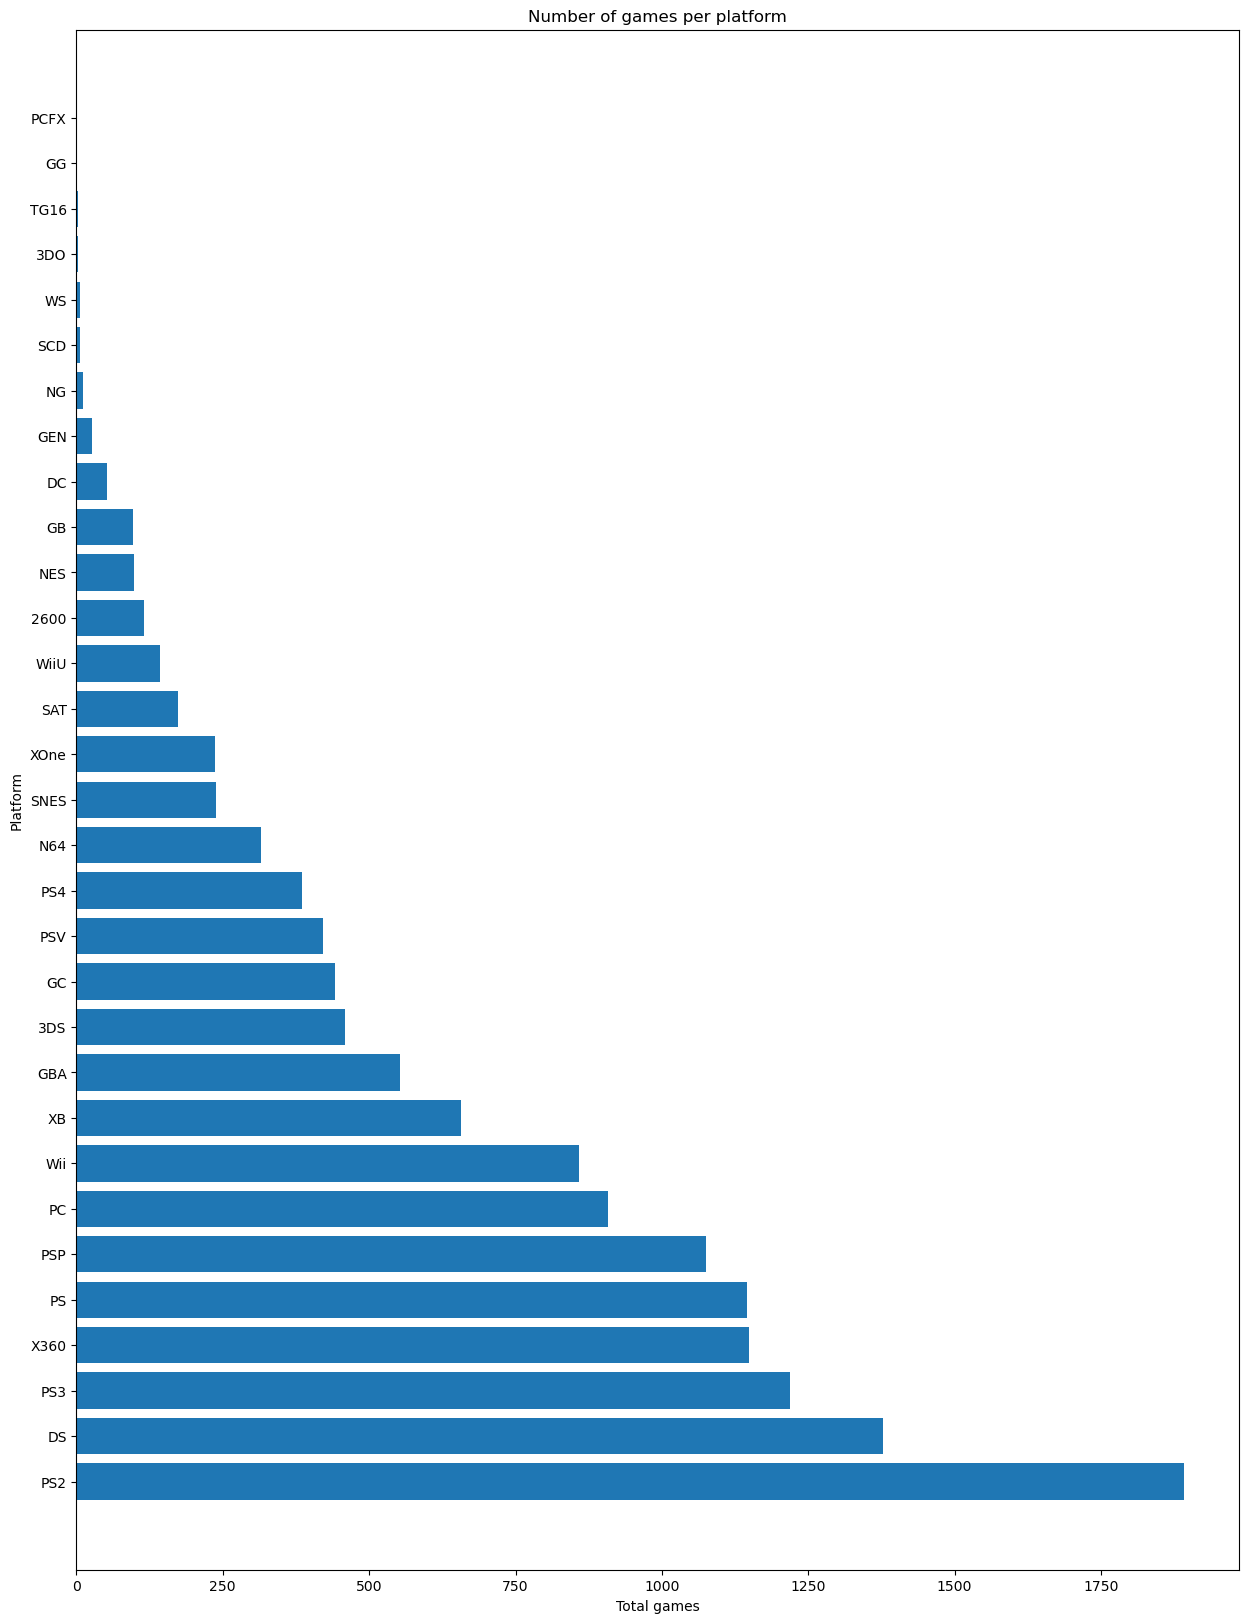

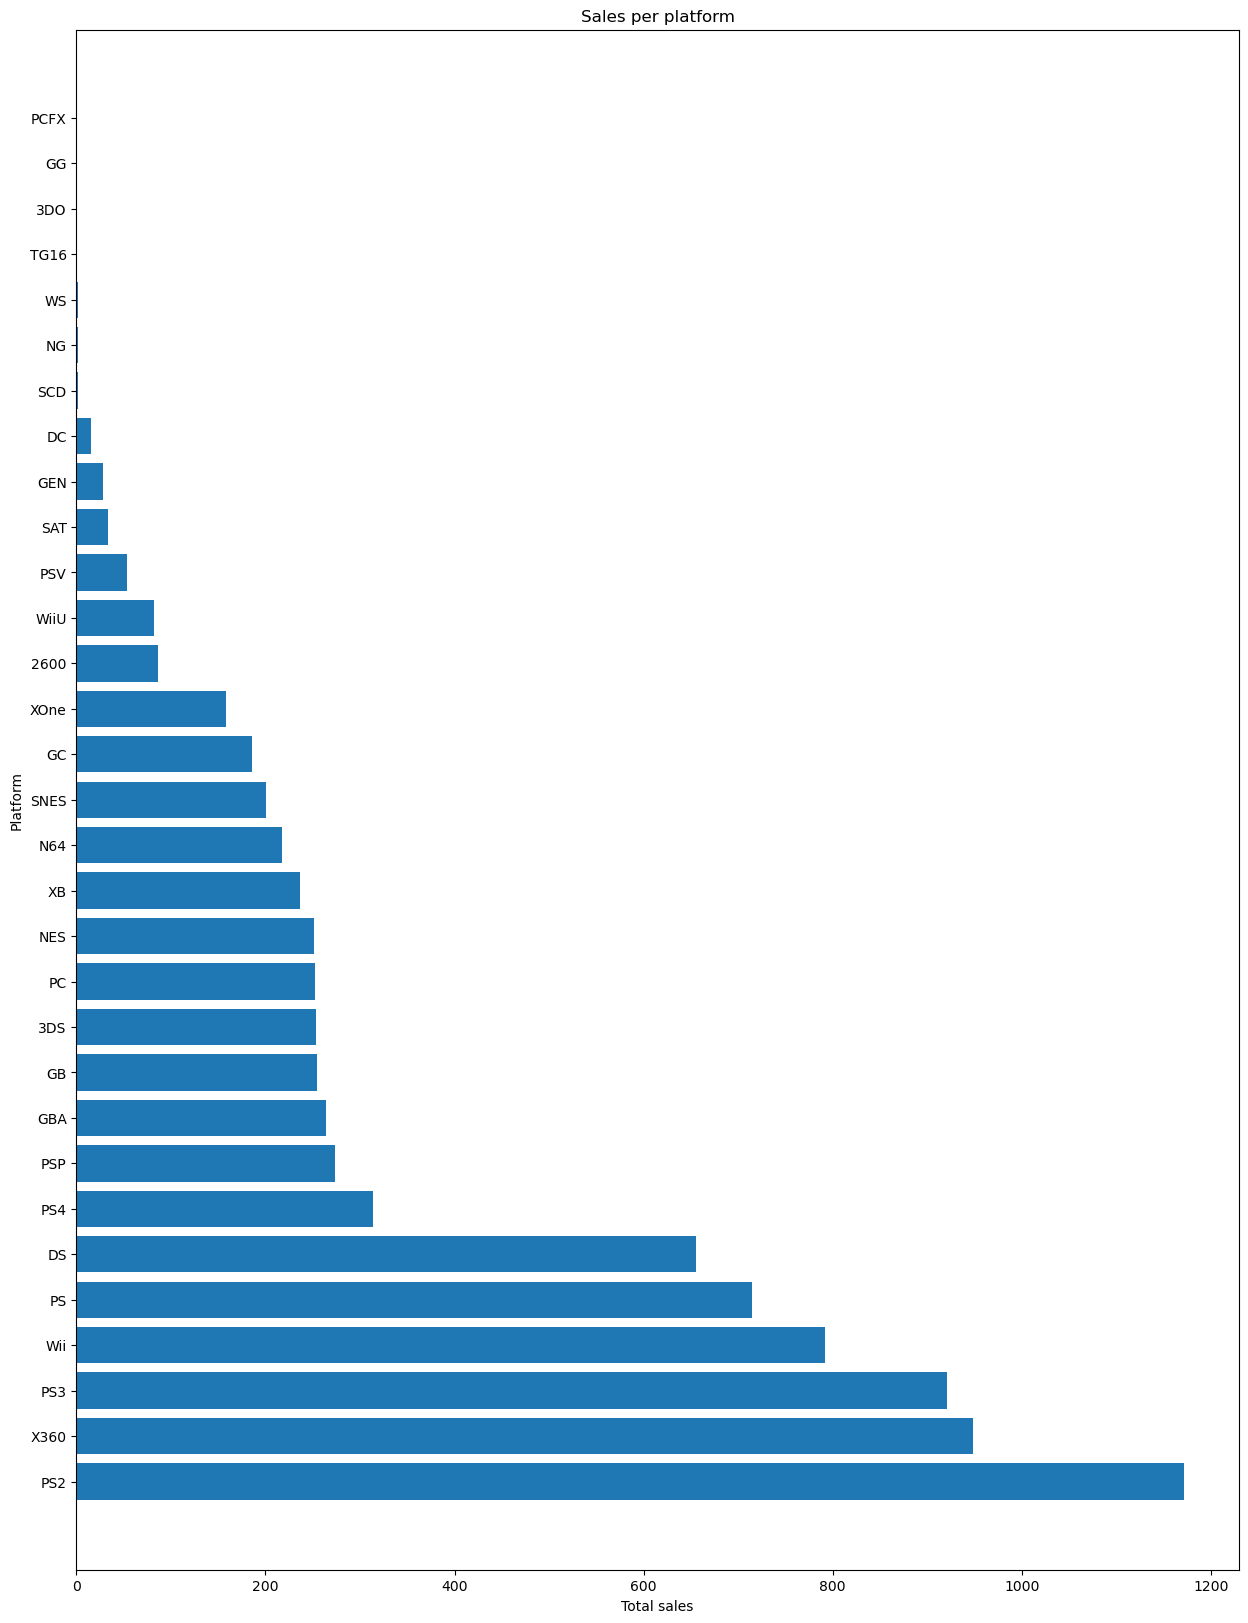

In [11]:
print('Avarage sales per platform')
display(df.groupby(['platform']).total_sales.mean().sort_values(ascending=False))
print('Total sales per platform')
display(df.groupby(['platform']).total_sales.sum().sort_values(ascending=False))

# print(df['platform'].nunique())
plt.figure(figsize=(15,20))
plt.barh(df['platform'].value_counts().index, df['platform'].value_counts())
plt.title(label='Number of games per platform', loc='center')
plt.xlabel("Total games")
plt.ylabel("Platform")
plt.show()

plt.figure(figsize=(15,20))
plt.barh(df.groupby(['platform']).total_sales.sum().sort_values(ascending=False).index,
         df.groupby(['platform']).total_sales.sum().sort_values(ascending=False))
plt.title(label='Sales per platform', loc='center')
plt.xlabel("Total sales")
plt.ylabel("Platform")
plt.show()

Let's focus on the six leaders and look at the distribution of sales by year.  
To do this, let's create a new dataset and plot the graphs.  


['Wii' 'DS' 'X360' 'PS3' 'PS2' 'PS']
Data about PS


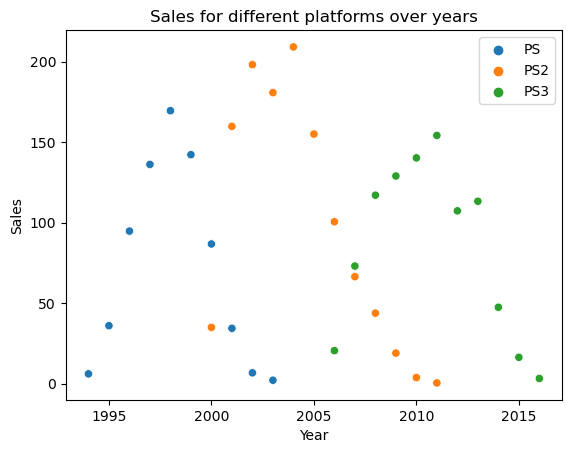

Top 6 not PS


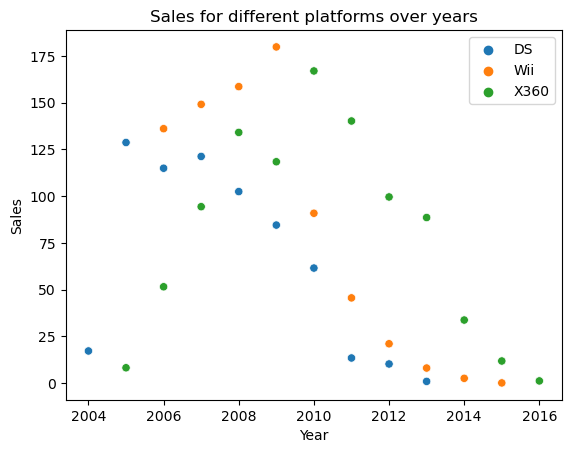

In [12]:
# new dataset with leaders 
big_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS']
df_platforms = df.loc[df['platform'].isin(big_platforms)]

print(df_platforms['platform'].unique())

# 1985 is a year with clear outliners
df_platforms = df_platforms[df_platforms['year_of_release'] != 1985]

df_platforms = pd.pivot_table(df_platforms, values=['total_sales'], index=['platform', 'year_of_release'],
                        aggfunc={'total_sales': np.sum})

first_three = ['PS', 'PS2', 'PS3']
second_three = ['X360', 'Wii', 'DS']
df_platforms = df_platforms.reset_index(['platform', 'year_of_release'])

print('Data about PS')
sns.scatterplot(data = df_platforms.loc[df_platforms['platform'].isin(first_three)],
             x = df_platforms.loc[df_platforms['platform'].isin(first_three)]['year_of_release'],
             y = df_platforms.loc[df_platforms['platform'].isin(first_three)]['total_sales'],
             hue = df_platforms.loc[df_platforms['platform'].isin(first_three)]['platform'],
             marker = 'o')

plt.legend(loc='upper right')
plt.title(label='Sales for different platforms over years', loc='center')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

print('Top 6 not PS')
sns.scatterplot(data = df_platforms.loc[df_platforms['platform'].isin(second_three)],
             x = df_platforms.loc[df_platforms['platform'].isin(second_three)]['year_of_release'],
             y = df_platforms.loc[df_platforms['platform'].isin(second_three)]['total_sales'],
             hue = df_platforms.loc[df_platforms['platform'].isin(second_three)]['platform'],
             marker = 'o')

plt.legend(loc='upper right')
plt.title(label='Sales for different platforms over years', loc='center')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

**Result:**  
According to the graphs, the approximate lifetime of the platform is 10 years.  
The PS example shows that a new generation appears about every 5 years.

## Which platforms are leading in sales, growing or falling? 
For further analysis of the data, let's choose the last 3 years (2014-2016) as the actual period, we will leave only them in the dataset to conduct all further analysis on them.
In recent years, the best results show PS4 and XOne. These platforms are the most promising at the moment.  
Overall, the graphical analysis shows that there are no favorites that would have a noticeable increase in sales at this time, except for a slight uptick for the 3DS.

Data from 2014 to 2016:


platform
PS4     288.01
XOne    139.81
3DS      85.38
PS3      66.86
X360     46.86
WiiU     42.58
PC       26.96
PSV      22.09
Wii       2.76
PSP       0.36
Name: total_sales, dtype: float64

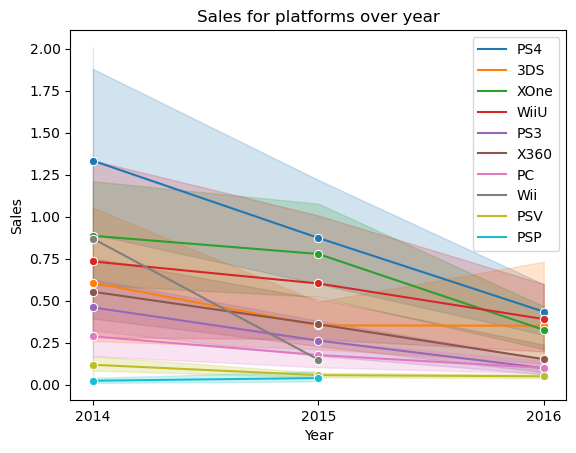

In [13]:
# Selecting useful data
df_full_time = df
df = df.loc[(df['year_of_release'] >= 2014)]

print('Data from 2014 to 2016:')
display(df.groupby(['platform']).total_sales.sum().sort_values(ascending=False))

sns.lineplot(data = df,
             x = df['year_of_release'],
             y = df['total_sales'],
             hue = df['platform'],
             marker = 'o')

plt.legend(loc='upper right')
plt.title(label='Sales for platforms over year', loc='center')
plt.xticks([2014, 2015, 2016])
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

## A box-and-whisker chart of global game sales by platform.
Let's look at the most promising platforms (PS4, XOne).  

The overall picture is very similar, although the bulk of sales are low, the big box office is made by the outliers - the most poplar games that go well beyond the edges of a statistically significant sample. In this case, though, those values aren't wrong, but instead are very important to sales.
For both platforms, the first three quartiles are within the standard value, which just shows the large impact of outliers.
At the same time, the median in both cases is small (about 0.2 million copies for both platforms).


PS4


count    370.000000
mean       0.778405
std        1.625241
min        0.010000
25%        0.060000
50%        0.195000
75%        0.697500
max       14.630000
Name: total_sales, dtype: float64

XOne


count    217.000000
mean       0.644286
std        1.064767
min        0.010000
25%        0.060000
50%        0.220000
75%        0.660000
max        7.390000
Name: total_sales, dtype: float64

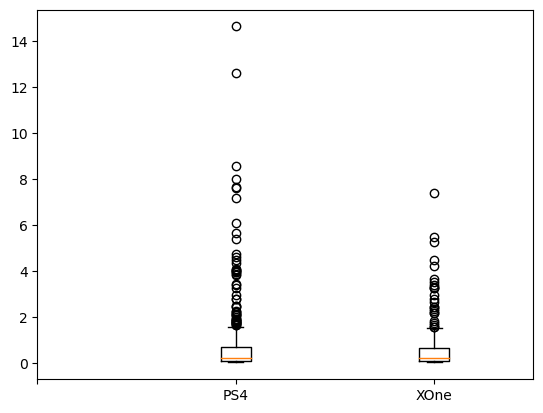

Data around median value


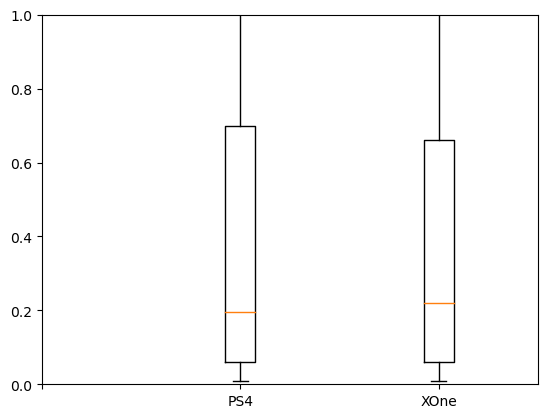

In [14]:
big_and_promissing_platforms = ['PS4', 'XOne']
for plat in big_and_promissing_platforms:
    print(plat)
    display(df.loc[df['platform'] == plat].total_sales.describe())
    
    
box_dict = {'PS4': df.loc[df['platform'] == 'PS4']['total_sales'],
            'XOne': df.loc[df['platform'] == 'XOne']['total_sales']}

plt.boxplot(box_dict.values())
plt.xticks(np.arange(3), ['', 'PS4', 'XOne'])
plt.show()


print('Data around median value')
plt.boxplot(box_dict.values())
plt.xticks(np.arange(3), ['', 'PS4', 'XOne'])
plt.ylim(0, 1)
plt.show()

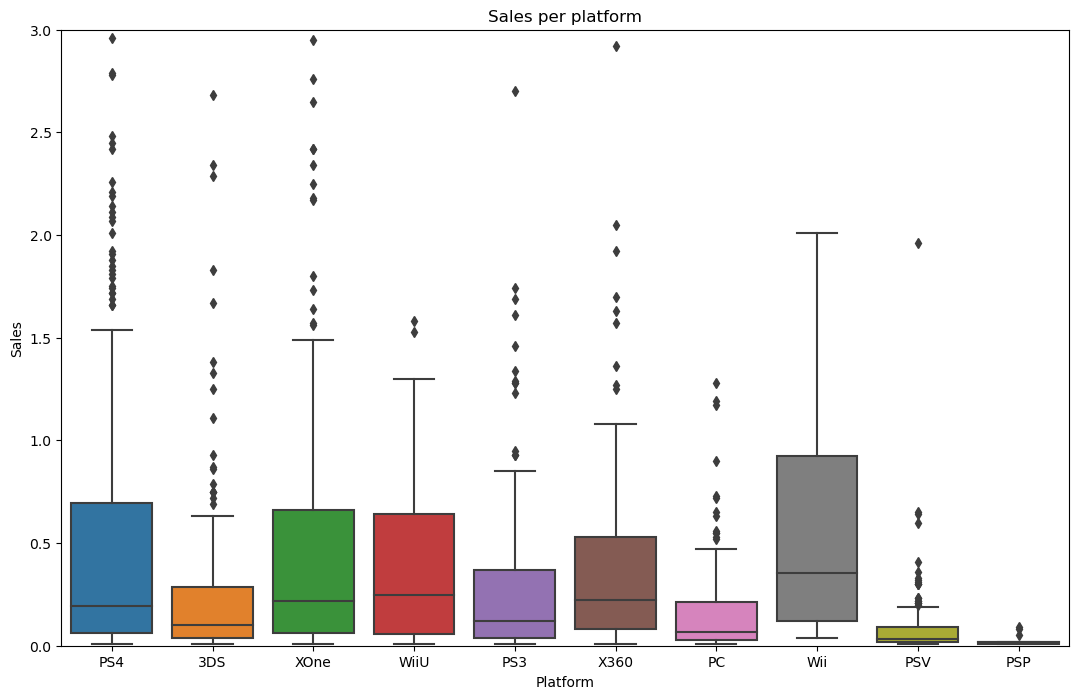

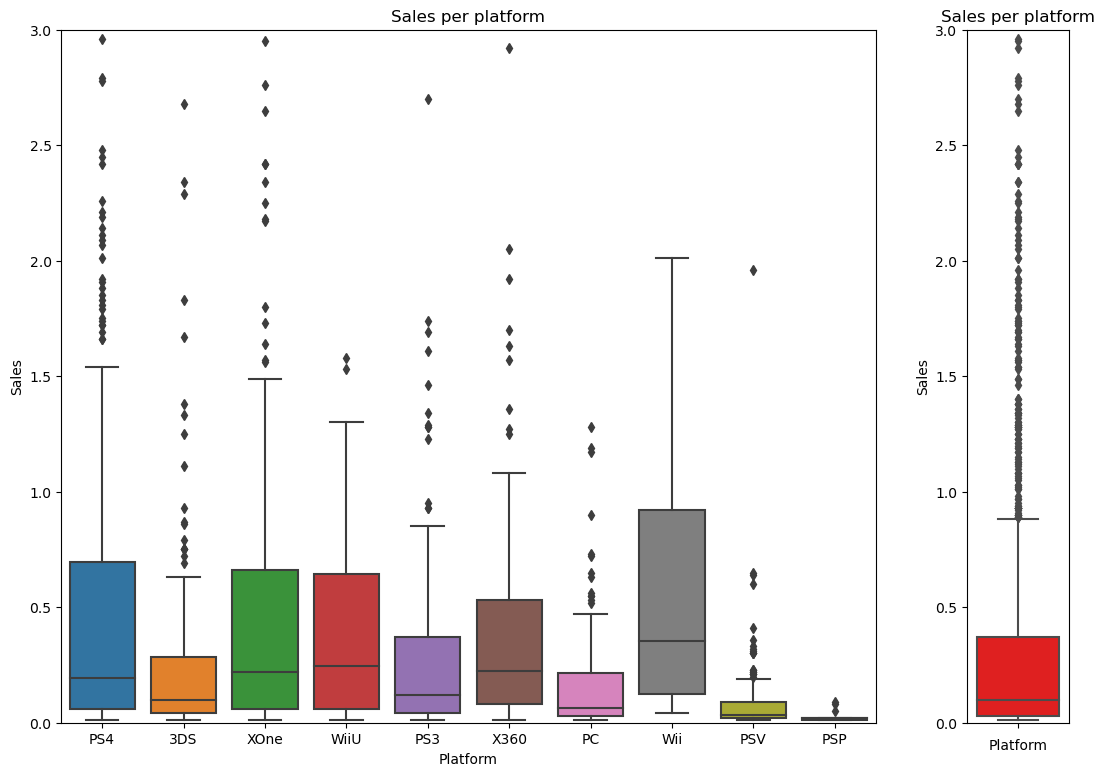

In [15]:
# A bit more beautiful option for visualization

plt.figure(figsize=(13, 8))

(sns.boxplot(data = df, y = 'total_sales', x = 'platform').
    set(title = 'Sales per platform', xlabel = 'Platform', ylabel = 'Sales', ylim=(0, 3)))

plt.show()


fig, axs = plt.subplots(1, 2, figsize=(13, 9), gridspec_kw={'width_ratios': [8, 1]})
(sns.boxplot(data=df, y='total_sales', x='platform', ax=axs[0]).
    set(title = 'Sales per platform', xlabel = 'Platform', ylabel = 'Sales', ylim=(0, 3)))

(sns.boxplot(data=df, y='total_sales', color='red', ax=axs[1]).
    set(title = 'Sales per platform', xlabel = 'Platform', ylabel = 'Sales', ylim=(0, 3)))
plt.show()


## Let's take a look at the impact of critic and user reviews on sales for PS4 and XOne, the most popular consoles.
It turned out, judging by the correlation coefficients, that user ratings have almost no effect on final sales, while critics' ratings have a positive correlation that has a medium strength (coefficients of 0.40 and 0.42 for PS4 and XOne, respectively).


Analysis for PS4:
Critics


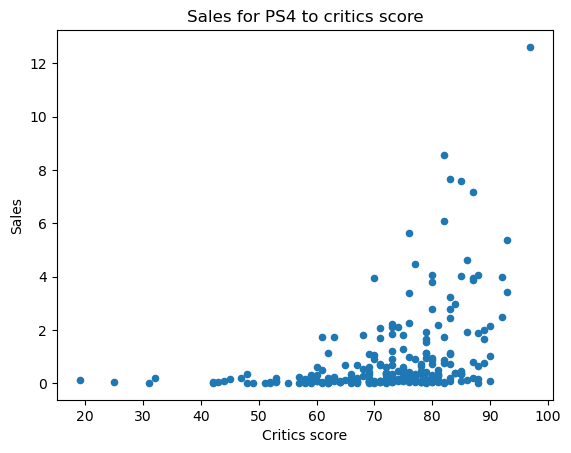

0.4024977965236979
Users


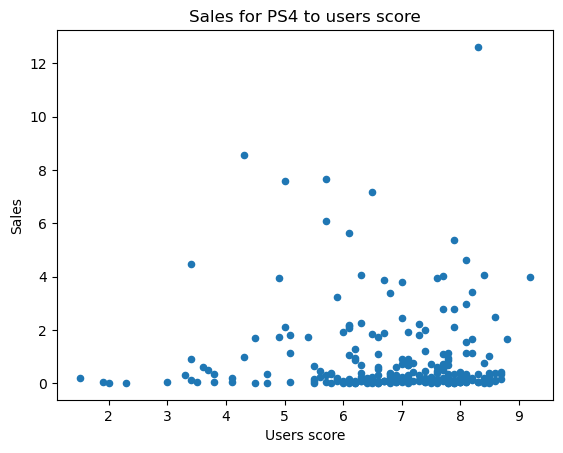

-0.040131589472697286
Analysis for XOne:
Critics


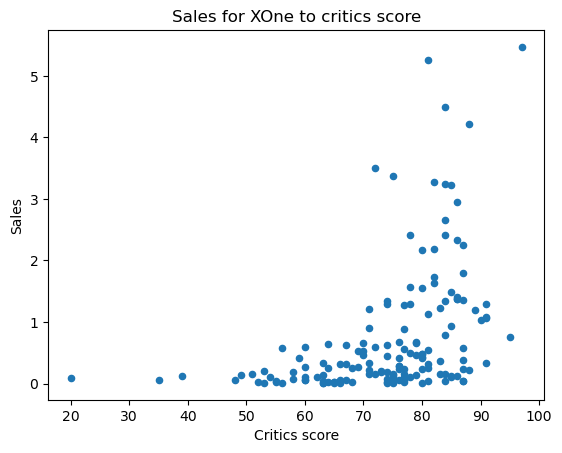

0.4241014294627528
Users


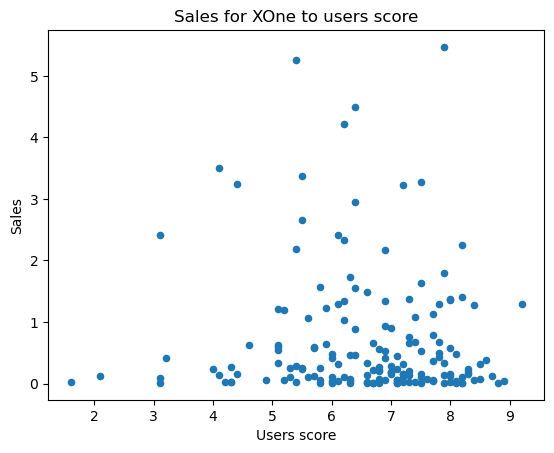

-0.07038392806475818


In [16]:
def analysis_of_sales (platform_name, dataframe):
    print(f'Analysis for {platform_name}:')
    print('Critics')
    df.loc[df['platform'] == platform_name].plot(x='critic_score', y='total_sales', kind='scatter') 
    plt.title(label=f'Sales for {platform_name} to critics score', loc='center')
    plt.xlabel("Critics score")
    plt.ylabel("Sales")
    plt.show()
    print(df.loc[df['platform'] == platform_name]['critic_score'].corr
          (df.loc[df['platform'] == platform_name]['total_sales']))
    print('Users')
    df.loc[df['platform'] == platform_name].plot(x='user_score', y='total_sales', kind='scatter') 
    plt.title(label=f'Sales for {platform_name} to users score', loc='center')
    plt.xlabel("Users score")
    plt.ylabel("Sales")
    plt.show()
    print(df.loc[df['platform'] == platform_name]['user_score'].corr
          (df.loc[df['platform'] == platform_name]['total_sales']))
    
analysis_of_sales('PS4', df)
analysis_of_sales('XOne', df)

## Correlation of conclusions with general indicators for all platforms.
In general, the overall trend is similar, although the correlation with critics' scores is generally worse than for selected popular platforms.
The general trend remains the same for all platforms for which data are available.
It turns out that when evaluating the success of a product, it is necessary to focus on critics' evaluations, while the opinion of users can be disregarded.

Analysis for PS4:
Critics
0.4024977965236979
Users
-0.040131589472697286


Analysis for 3DS:
Critics
0.28468579095782925
Users
0.2151932718527028


Analysis for XOne:
Critics
0.4241014294627528
Users
-0.07038392806475818


Analysis for WiiU:
Critics
0.3756402218389979
Users
0.40792645792170795


Analysis for PS3:
Critics
0.44657460493190715
Users
-0.16676141347662107


Analysis for X360:
Critics
0.5257228356581521
Users
-0.1384445709456651


Analysis for PC:
Critics
0.17463413769350028
Users
-0.07159665703472454


Analysis for PSV:
Critics
0.041029089741713314
Users
-0.16845504978064438


Overall stats:


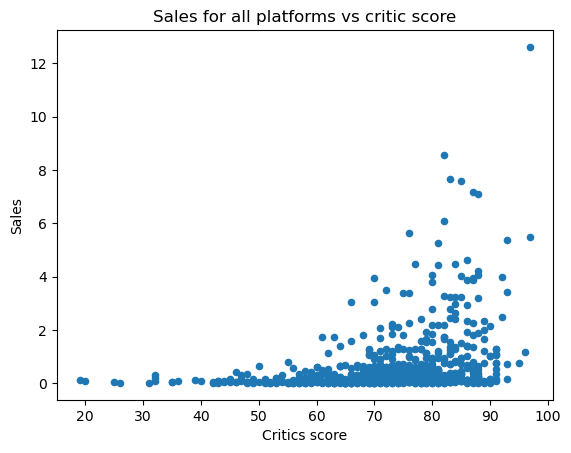

0.32601887569374915
Users


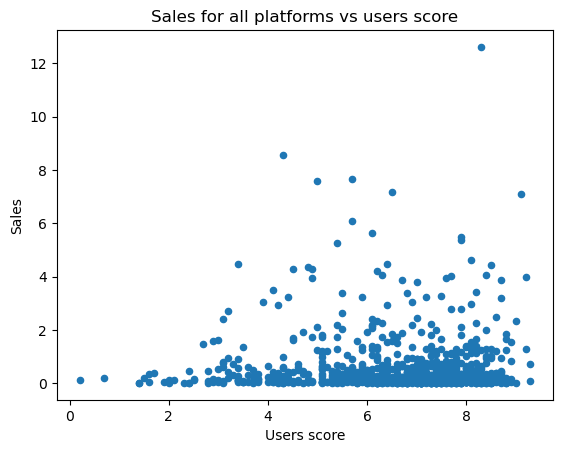

-0.01307030500248456


In [17]:
def only_correlation(platform_name, df):
    if (np.isfinite(df.loc[df['platform'] == platform_name]['critic_score'].corr
          (df.loc[df['platform'] == platform_name]['total_sales']))) & (np.isfinite
                (df.loc[df['platform'] == platform_name]['user_score'].corr
          (df.loc[df['platform'] == platform_name]['total_sales']))):
            print(f'Analysis for {platform_name}:')
            print('Critics')
            print(df.loc[df['platform'] == platform_name]['critic_score'].corr
             (df.loc[df['platform'] == platform_name]['total_sales']))
            print('Users')
            print(df.loc[df['platform'] == platform_name]['user_score'].corr
              (df.loc[df['platform'] == platform_name]['total_sales']))
            print('\n')

for plat in df['platform'].unique():
    only_correlation(plat, df)

print('Overall stats:')
df.plot(x='critic_score', y='total_sales', kind='scatter') 
plt.title(label='Sales for all platforms vs critic score', loc='center')
plt.xlabel("Critics score")
plt.ylabel("Sales")
plt.show()
print(df['critic_score'].corr(df['total_sales']))
print('Users')
df.plot(x='user_score', y='total_sales', kind='scatter') 
plt.title(label='Sales for all platforms vs users score', loc='center')
plt.xlabel("Users score")
plt.ylabel("Sales")
plt.show()
print(df['user_score'].corr(df['total_sales']))

It is also interesting to see how the critics' and users' evaluations themselves are related.
A good positive correlation was found.

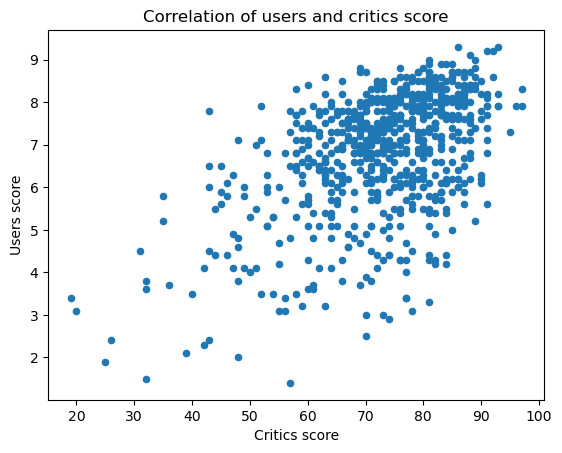

0.5044604031800758


In [18]:
df.plot(x='critic_score', y='user_score', kind='scatter') 
plt.title(label='Correlation of users and critics score', loc='center')
plt.xlabel("Critics score")
plt.ylabel("Users score")
plt.show()
print(df['critic_score'].corr(df['user_score']))

## General distribution of games by genre. 
To consider the indicators by genre, it is logical to consider the average values.
In this case, the favorites are platformers and shooters, in the top five are also races, sports games and RPGs.  
Undisputed outsiders are strategies (well, on consols, no one really play them) and adventures.
In absolute terms, the leading games are Action, Sports and Shooter genres, in the tail, again, strategies and adventures.
It's also interesting to note that strategy and adventure are the most stable games in terms of expectations.  
While the sales leaders, especially shooters, have the greatest variation around the standard value and are relatively less predictable.

Avarage sales per genre


genre
Shooter         1.387967
Sports          0.722450
Platform        0.519412
Fighting        0.485172
Role-Playing    0.459005
Racing          0.413182
Misc            0.356238
Action          0.337997
Simulation      0.323000
Puzzle          0.209000
Strategy        0.107027
Adventure       0.094886
Name: total_sales, dtype: float64

Total sales per genre


genre
Action          195.70
Shooter         170.72
Sports          109.09
Role-Playing    101.44
Misc             35.98
Fighting         28.14
Racing           27.27
Platform         17.66
Adventure        16.70
Simulation       12.92
Strategy          3.96
Puzzle            2.09
Name: total_sales, dtype: float64

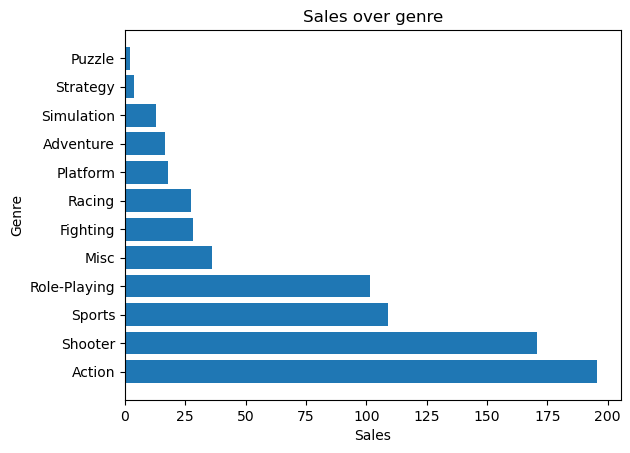

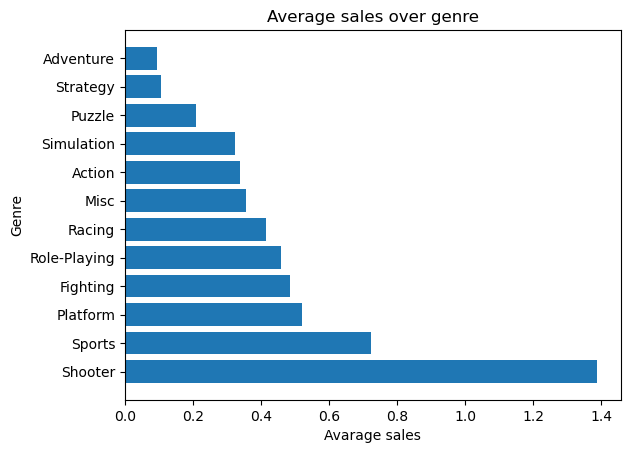

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,123.0,1.387967,2.075080,0.01,0.2250,0.560,1.6650,14.63
Sports,151.0,0.722450,1.268912,0.01,0.0800,0.240,0.7300,8.58
Fighting,58.0,0.485172,1.205920,0.01,0.0625,0.130,0.3200,7.55
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Racing,66.0,0.413182,0.983246,0.01,0.0300,0.095,0.2575,7.09
Action,579.0,0.337997,0.821347,0.01,0.0300,0.100,0.2950,12.62
Misc,101.0,0.356238,0.771536,0.01,0.0300,0.110,0.3300,5.27
Platform,34.0,0.519412,0.752720,0.01,0.0625,0.145,0.6075,3.21
Simulation,40.0,0.323000,0.674108,0.01,0.0200,0.105,0.3525,3.05


In [19]:
print('Avarage sales per genre')
display(df.groupby(['genre']).total_sales.mean().sort_values(ascending=False))
print('Total sales per genre')
display(df.groupby(['genre']).total_sales.sum().sort_values(ascending=False))

plt.barh(df.groupby(['genre']).total_sales.sum().sort_values(ascending=False).index,
         df.groupby(['genre']).total_sales.sum().sort_values(ascending=False))
plt.title(label='Sales over genre', loc='center')
plt.xlabel("Sales")
plt.ylabel("Genre")
plt.show()


plt.barh(df.groupby(['genre']).total_sales.mean().sort_values(ascending=False).index,
         df.groupby(['genre']).total_sales.mean().sort_values(ascending=False))
plt.title(label='Average sales over genre', loc='center')
plt.xlabel("Avarage sales")
plt.ylabel("Genre")
plt.show()

display(df.groupby(['genre']).total_sales.describe().sort_values(by='std', ascending=False))

## Conclusions
An exploratory analysis of the data was performed, including:  
Reviewed sales data by year and by platform, identified industry leaders (PS2, X360, PS3, Wii, PS, DS) as well as the leading platforms at the moment (XOne, PS4). It was determined that the average life of a platform is about 10 years, while a new generation appears about every 5 years.  
The interval from 2014 to 2016 was chosen as a reliable interval for estimating future sales.  
Also, the correlation between user and critic ratings on sales was analyzed, while critic ratings have a moderately significant positive correlation, user ratings are weakly correlated with sales. Both for market leaders and in general.  
The genres generating the most sales in average (platformers and shooters) and the least (strategy and adventure) were identified.

# A portrait of users in each region
## Most popular platforms (top 5)
The most popular platforms for each region as a share of all sales are summarized below.  
In North America, the PS4 and XOne are the leading platforms, as well as the corresponding older generation platforms (PS3, X360), as well as in other countries.  
In Europe, the two leading platforms are also PS4, XOne.  

The picture is unique for Japan, where X-Box products are not represented in the leaders, and PC, although it occupies places in the leaders, is inferior in popularity to DS. This is probably due to the popularity of Nintendo in its home country.


In [20]:
print('Most popular games in Nort America')
display(df.groupby(['platform']).na_sales.sum().sort_values(ascending=False).head(5)/df['na_sales'].sum())

print('Most popular games in Europe')
display(df.groupby(['platform']).eu_sales.sum().sort_values(ascending=False).head(5)/df['eu_sales'].sum())

print('Most popular games in Japan')
display(df.groupby(['platform']).jp_sales.sum().sort_values(ascending=False).head(5)/df['jp_sales'].sum())

print('Most popular games in other countries')
display(df.groupby(['platform']).other_sales.sum().sort_values(ascending=False).head(5)/df['other_sales'].sum())

Most popular games in Nort America


platform
PS4     0.350423
XOne    0.287910
X360    0.097986
3DS     0.079093
PS3     0.077635
Name: na_sales, dtype: float64

Most popular games in Europe


platform
PS4     0.486750
XOne    0.172518
PS3     0.093465
PC      0.066926
3DS     0.057718
Name: eu_sales, dtype: float64

Most popular games in Japan


platform
3DS     0.477081
PS4     0.162378
PSV     0.156000
PS3     0.117297
WiiU    0.079027
Name: jp_sales, dtype: float64

Most popular games in other countries


platform
PS4     0.549228
XOne    0.154169
PS3     0.113897
X360    0.052254
3DS     0.044472
Name: other_sales, dtype: float64

## Most popular genres (top 5)
When analyzing the popular genres, you can also see the difference between Japan and the Western world.  
In North America and Europe, the first three leaders are the same: Actions, Sports, Shooters, as well as in the rest of the world.  
In Japan, RPGs are the most interesting to users, which is in line with the traditional popularity of ~~MMO~~ RPGs in East Asia.

In [21]:
print('Most popular genres in North America')
display(df.groupby(['genre']).na_sales.sum().sort_values(ascending=False).head(5)/df['na_sales'].sum())

print('Most popular genres in Europe')
display(df.groupby(['genre']).eu_sales.sum().sort_values(ascending=False).head(5)/df['eu_sales'].sum())

print('Most popular genres in Japan')
display(df.groupby(['genre']).jp_sales.sum().sort_values(ascending=False).head(5)/df['jp_sales'].sum())

print('Most popular genres in other countries')
display(df.groupby(['genre']).other_sales.sum().sort_values(ascending=False).head(5)/df['other_sales'].sum())

Most popular genres in North America


genre
Shooter         0.280687
Action          0.253220
Sports          0.163773
Role-Playing    0.119085
Misc            0.050914
Name: na_sales, dtype: float64

Most popular genres in Europe


genre
Action          0.273806
Shooter         0.244947
Sports          0.170235
Role-Playing    0.105442
Racing          0.052515
Name: eu_sales, dtype: float64

Most popular genres in Japan


genre
Role-Playing    0.336865
Action          0.314703
Fighting        0.068541
Misc            0.060649
Shooter         0.052649
Name: jp_sales, dtype: float64

Most popular genres in other countries


genre
Action          0.275108
Shooter         0.265843
Sports          0.176899
Role-Playing    0.106733
Misc            0.048178
Name: other_sales, dtype: float64

## Impact of ESRB rating on regional sales
Again we can see the difference between Japan and the rest of the world.  
In the world, purchases are mainly in the M, E, T categories respectively.  
In Japan as well, but the order of purchases is T, E, M.

In [22]:
print('Distribution of purchases by rating in North America')
display(df.groupby(['rating']).na_sales.sum().sort_values(ascending=False)/df['na_sales'].sum())

print('Distribution of purchases by rating in Europe')
display(df.groupby(['rating']).eu_sales.sum().sort_values(ascending=False)/df['eu_sales'].sum())

print('Distribution of purchases by rating in Japan')
display(df.groupby(['rating']).jp_sales.sum().sort_values(ascending=False)/df['jp_sales'].sum())

print('Distribution of purchases by rating in other countries')
display(df.groupby(['rating']).other_sales.sum().sort_values(ascending=False)/df['other_sales'].sum())

print('Distribution of purchases by rating overall')
display(df.groupby(['rating']).total_sales.sum().sort_values(ascending=False)/df['total_sales'].sum())

Distribution of purchases by rating in North America


rating
M       0.342845
E       0.178787
T       0.137906
E10+    0.110332
Name: na_sales, dtype: float64

Distribution of purchases by rating in Europe


rating
M       0.349678
E       0.215002
T       0.127003
E10+    0.088449
Name: eu_sales, dtype: float64

Distribution of purchases by rating in Japan


rating
T       0.154811
E       0.096649
M       0.086595
E10+    0.046811
Name: jp_sales, dtype: float64

Distribution of purchases by rating in other countries


rating
M       0.354169
E       0.188635
T       0.139469
E10+    0.090673
Name: other_sales, dtype: float64

Distribution of purchases by rating overall


rating
M       0.313800
E       0.182771
T       0.136212
E10+    0.091884
Name: total_sales, dtype: float64

## Additional Analysis
Currently, Europe and North America have roughly equal market shares of about 40%, while Japan and other countries each have about 10%.  


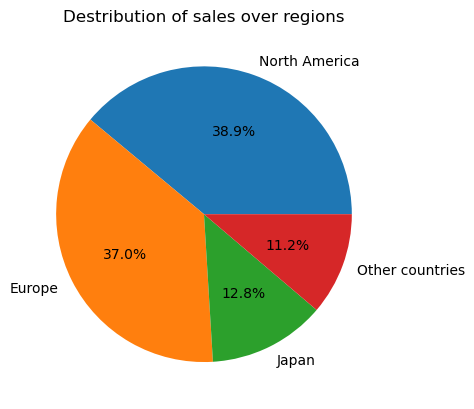

In [23]:
fig, ax = plt.subplots()
values_pie_plot = [df['na_sales'].sum(), df['eu_sales'].sum(), df['jp_sales'].sum(), df['other_sales'].sum()]
labels_pie_plot = ['North America', 'Europe', 'Japan', 'Other countries']
ax.pie(values_pie_plot, labels=labels_pie_plot, autopct='%1.1f%%')
plt.title(label='Destribution of sales over regions', loc='center')
plt.show()



Let's consider which users most oftenly buy games and what dynamics this process has over the entire period of observation.
For the entire period of observation we can see that users from North America reach almost 50% of sales, users from Europe a little more than a quarter, 15% users from Japan, and users from other regions less than 10%.  
It can be seen that the largest number of copies sold games that are about 10 years old.  
Probably, launch sales are not as important as the longer term love of players. This pattern is most pronounced in North America.

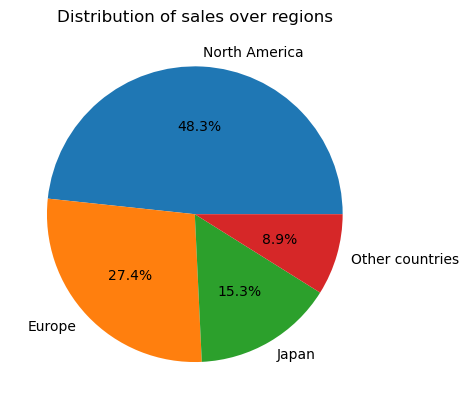

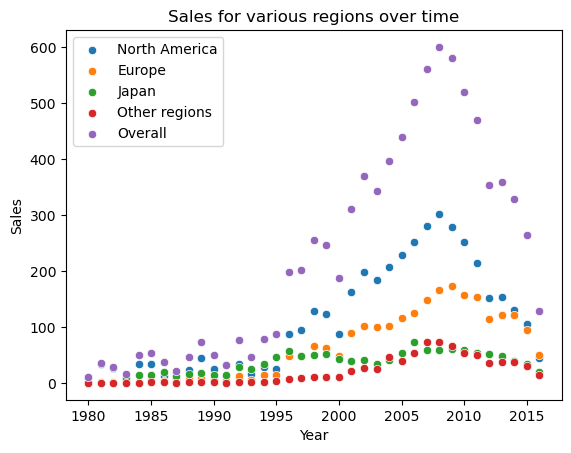

In [24]:
fig, ax = plt.subplots()
values_pie_plot = [df_full_time['na_sales'].sum(), df_full_time['eu_sales'].sum(),
                   df_full_time['jp_sales'].sum(), df_full_time['other_sales'].sum()]
labels_pie_plot = ['North America', 'Europe', 'Japan', 'Other countries']
ax.pie(values_pie_plot, labels=labels_pie_plot, autopct='%1.1f%%')
plt.title(label='Distribution of sales over regions', loc='center')
plt.show()

# Dinamics of saler by region over time
sns.scatterplot(data = df_full_time.groupby(['year_of_release'])['na_sales'].sum(),
             x = df_full_time.groupby(['year_of_release'])['na_sales'].sum().index,
             y = df_full_time.groupby(['year_of_release'])['na_sales'].sum(),
             marker = 'o', label='North America')

sns.scatterplot(data = df_full_time.groupby(['year_of_release'])['eu_sales'].sum(),
             x = df_full_time.groupby(['year_of_release'])['eu_sales'].sum().index,
             y = df_full_time.groupby(['year_of_release'])['eu_sales'].sum(),
             marker = 'o', label='Europe')

sns.scatterplot(data = df_full_time.groupby(['year_of_release'])['jp_sales'].sum(),
             x = df_full_time.groupby(['year_of_release'])['jp_sales'].sum().index,
             y = df_full_time.groupby(['year_of_release'])['jp_sales'].sum(),
             marker = 'o', label='Japan')

sns.scatterplot(data = df_full_time.groupby(['year_of_release'])['other_sales'].sum(),
             x = df_full_time.groupby(['year_of_release'])['other_sales'].sum().index,
             y = df_full_time.groupby(['year_of_release'])['other_sales'].sum(),
             marker = 'o', label='Other regions')

sns.scatterplot(data = df_full_time.groupby(['year_of_release'])['total_sales'].sum(),
             x = df_full_time.groupby(['year_of_release'])['total_sales'].sum().index,
             y = df_full_time.groupby(['year_of_release'])['total_sales'].sum(),
             marker = 'o', label='Overall')


plt.title(label='Sales for various regions over time', loc='center')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(loc='upper left')
plt.show()

## Conclusions
Sales in different regions were analyzed by genre, platform, and rating.  
Buyers from Europe, North America and the rest of the world show similar trends.  
Namely: the most popular consoles are PS and X360 series, Action, Sport, Shooter genres.  
For Japan, the picture is different: PS is still popular, but the best-selling consoles are DS, the genre leader is RPG.  
The rankings are generally distributed in a similar way in all countries, with the most popular being E, M, T (In Japan, E, T, M).

# Hypothesis testing
## Average user ratings of Xbox One and PC platforms are the same

Accordingly, the null hypothesis should be that the platform ratings are equal, and the alternative hypothesis should be that they are not equal.  


In [25]:
# Let's set the statistical significance level to 0.05 
alpha = 0.05

# for correct operation of the algorithm it is also necessary to discard NaN valuesя
results_first = st.ttest_ind(df.loc[df['platform'] == 'XOne']['user_score'].dropna(),
                     df.loc[df['platform'] == 'PC']['user_score'].dropna(),
                     equal_var=False,
                     alternative='two-sided')

print(results_first.pvalue)

if (results_first.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We do NOT reject the null hypothesis')


0.11601398086668832
We do NOT reject the null hypothesis


It turns out that the null hypothesis cannot be rejected, which means that the ratings of platforms are not statistically significantly different. Judging by the average values, the rating of games on PC from users is higher.

In [26]:
print('Avarage users raiting XOne:', df.loc[df['platform'] == 'XOne']['user_score'].mean())
print('Avarage users raiting PC:', df.loc[df['platform'] == 'PC']['user_score'].mean())

Avarage users raiting XOne: 6.594545454545454
Avarage users raiting PC: 6.298360655737705


## Average user ratings of Action and Sports genres are different.
Since the hypothesis is that the ratings are different, it is convenient to set the opposite hypothesis as the null hypothesis - that they are the same.  
The null hypothesis is that the ratings are the same, the alternative hypothesis is that they are higher or lower.

In [27]:
results_second = st.ttest_ind(df.loc[df['genre'] == 'Action']['user_score'].dropna(),
                     df.loc[df['genre'] == 'Sports']['user_score'].dropna(),
                     equal_var=False,
                     alternative='two-sided')

print(results_second.pvalue)

if (results_second.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We do NOT reject the null hypothesis')


1.1825550382644557e-14
We reject the null hypothesis


It can be argued that user ratings of action games and sports games differ in a statistically significant way.

## Conclusion
Thus after testing the hypotheses we can conclude that:  
PC and XOne rating from users are equal.  
And the rating of action and sports games are statistically really different.

# General conclusions
**About the work.** The data of the online game store "Streamchick" was analyzed.
**Provided data.** For this purpose, the store provided a dataset consisting of sales data (platform, genre, game release year, user and critic ratings, and sales in different regions). A total of 16713 unique values.
**Data preprocessing.** The data was manipulated for the convenience of their further analysis, in particular, column names were changed, variable types were changed, skips for title, genre and year of release were processed, total sales were calculated.
Information on critics', users', and game ratings is critically incomplete (about 50% omissions).  
**Research data analysis.** Sales were analyzed. The old industry leaders (PS2, X360, PS3, Wii, PS, DS) and the current leading platforms (XOne, PS4) were identified.
It is shown that the average lifetime of a platform is about 10 years, while a new generation appears about every 5 years. Accordingly, the interval from 2014 to 2016 was chosen as a reliable interval for estimating future sales.
Also, the correlation between user and critic ratings on sales was analyzed; while critic ratings have a moderately significant positive correlation, user ratings are weakly correlated with sales. Both for market leaders and in general. Therefore, when estimating game sales one should primarily focus on critics' evaluations.
The genres that bring on average the highest sales (platformers and shooters) and the lowest (strategies and adventures) were identified.
**User portrait.** According to the customer's requirements, an average portrait of users from different regions was compiled. It was shown that users from Europe, North America, and other countries are very close, while users from Japan have some notable differences.
Specifically, for North America, Europe and other countries: most popular consoles PS4 and XOne series, Action, Sport, Shooter genres, most popular sales by M, E, T rating.
While in Japan, the PS series is also popular, but the top selling consoles are DS, and the genre leader is RPG. The differences in sales by rating are insignificant (leaders T, E, M).
**Hypothesis testing.** Additionally, the following hypotheses were tested:
User ratings of PC and XOne from users are equal - the hypothesis proved to be true.
User ratings of action and sports games are different, this hypothesis also proved to be true.